## Date: 08 November 2019
## Filename: mc_first_visit_grid_world.ipynb
## Details: monte carlo first-visit simulation for gridworld example.
## Reference: Reinforcement Learning (Sutton, Barto)
## Language: Python

### Initializing Libraries

In [1]:
import numpy as np

import random

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### First-visit Monte Carlo

<img src="fv_mc.jpg">

In [3]:
# parameter definition

gridSize=4 # can be any other rational number as well, here as part of exercise, taking =4

terminationStates=[[0,0], [gridSize-1, gridSize-1]] # the terms which are end states or edge conditions and are not supposed to be filled, reason: it will tell whether the end-point of grid has been achieved or not.

actions=[[-1,0],[1,0],[0,1],[0,-1]]

In [4]:
# initialization
v=np.zeros((gridSize,gridSize))

returns={(i,j):list() for i in range(gridSize) for j in range(gridSize)}

deltas={(i,j):list() for i in range(gridSize) for j in range(gridSize)}           # for holding values of returns once the iteration is over within grid

states=[[i,j] for i in range(gridSize) for j in range(gridSize)]

In [5]:
# setting seed to avoid change in outputs because of random initializtion of values in episode
random.seed(1234)

### Function to generate episode:
> part-1 of the algorithm (before initializing g=0)

In [6]:
def generateEpisode(reward_sz=-1):
    initState = random.choice(states[1:-1])
    episode = []
    while True:                                      # generate a policy following pi: random_action, next_state........
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, reward_sz, list(finalState)])
        initState = finalState

In [7]:
generateEpisode() # to check whether the above function is working correctly or not, no relevance in terms of algo coding.

[[[3, 1], [0, -1], -1, [3, 0]],
 [[3, 0], [-1, 0], -1, [2, 0]],
 [[2, 0], [-1, 0], -1, [1, 0]],
 [[1, 0], [-1, 0], -1, [0, 0]]]

      
### Function to run the second loop to actually traverse through grids
> Loop inside the main loop

In [8]:
def create_v_pi(gamma, num_iter):   
    
    for it in range(num_iter):
        episode = generateEpisode()
        g = 0
        
        for i, step in enumerate(episode[::-1]):
            g = gamma*g + step[2]                                                                      # traversing grids and discounting the rewards
            if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
                index = (step[0][0], step[0][1])
                returns[index].append(g)                                                               # appending the current grid to returns matrix and finaling it in deltas
                new_val = np.average(returns[index])                                                   # V(St)=average(returns(St))            - here St means that particular state
                deltas[index[0], index[1]].append(np.abs(v[index[0], index[1]]-new_val))               # mirroring variable returns
                v[index[0], index[1]] = new_val

### Running for different discounting rates
> gamma=1 (here gamma is the discouting rate for the rewards)

[[ 0.         -4.2173913  -9.63157895 -9.46341463]
 [-4.66666667 -6.04       -8.70588235 -9.89285714]
 [-4.76470588 -8.96774194 -9.17777778 -5.19047619]
 [-7.25       -8.82142857 -4.675       0.        ]]


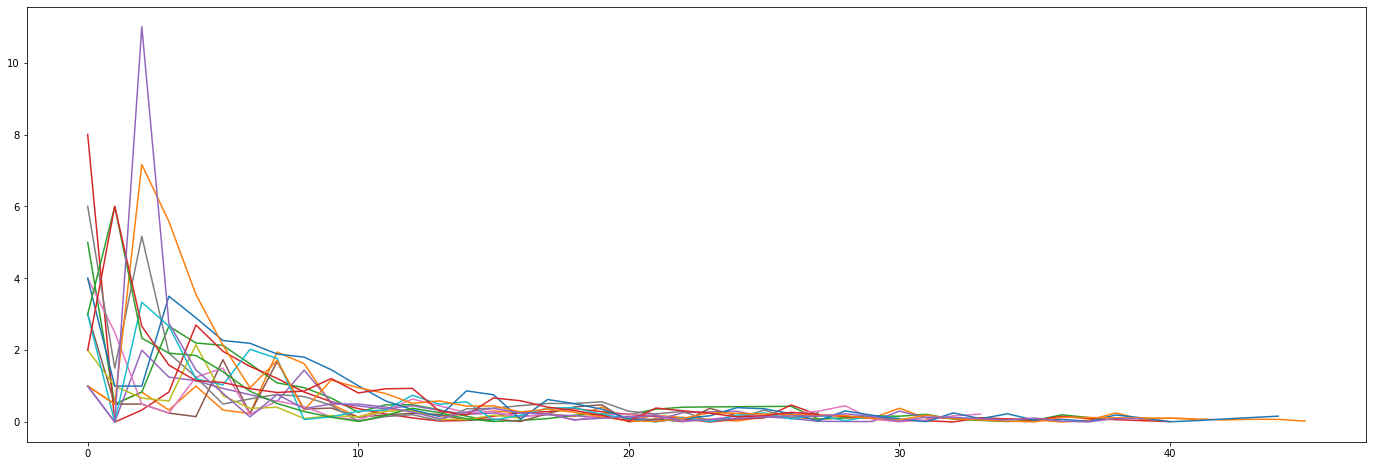

In [9]:
# defining gamma=1
create_v_pi(gamma=1, num_iter=70)
print(v)

# Plotting the delta
plt.figure(figsize=(24,8))
for return_vals in [list(x) for x in deltas.values()]:
    plt.plot(return_vals)

> gamma=0.6

[[ 0.         -3.08748015 -5.74434562 -6.79205216]
 [-3.06017703 -3.98015038 -5.91460938 -6.84813353]
 [-3.07998452 -6.53443591 -6.2328962  -3.46651866]
 [-4.44170311 -5.07703151 -3.17577067  0.        ]]


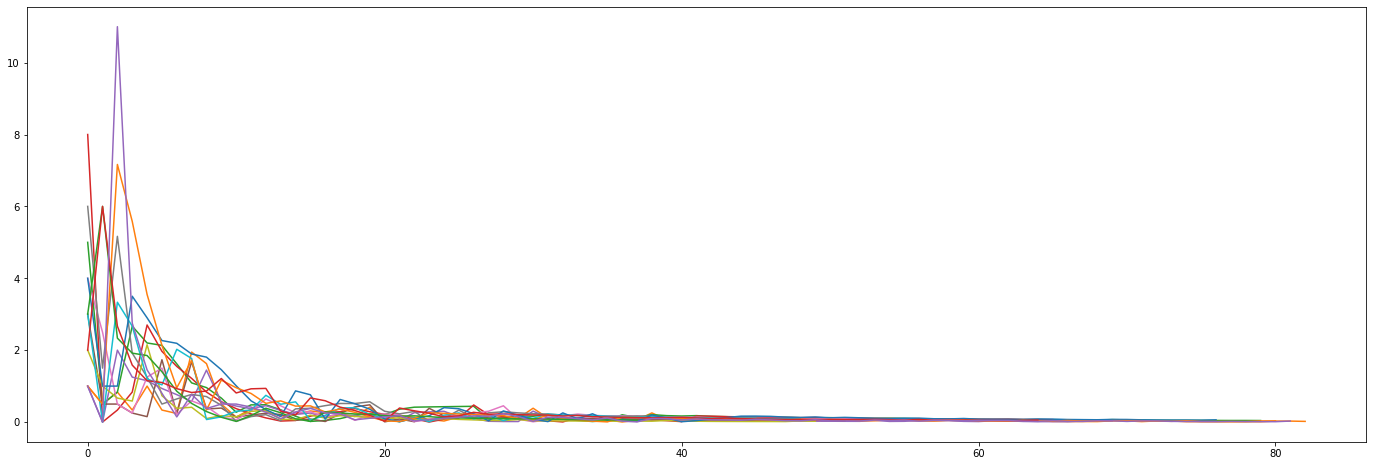

In [10]:
# defining gamma=0.6
create_v_pi(gamma=0.6, num_iter=70)
print(v)

# Plotting the delta
plt.figure(figsize=(24,8))
for return_vals in [list(x) for x in deltas.values()]:
    plt.plot(return_vals)

## Script Over